In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

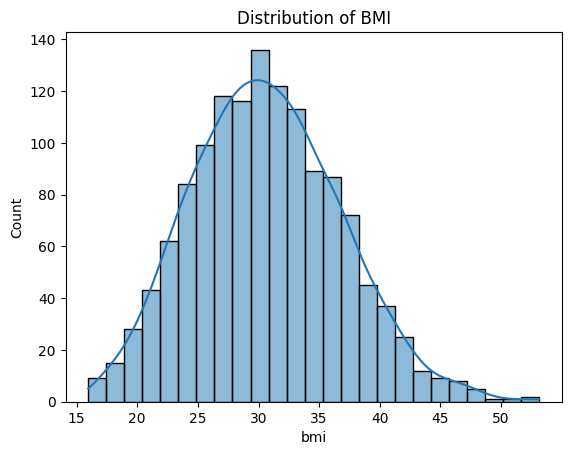

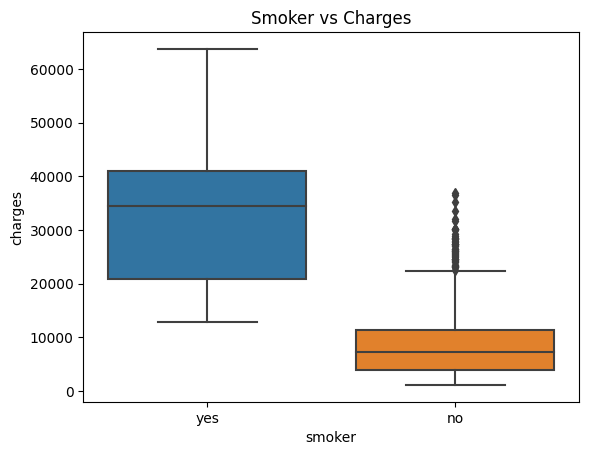

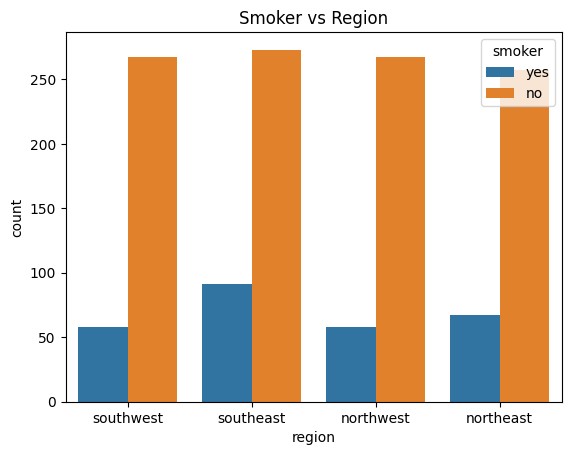

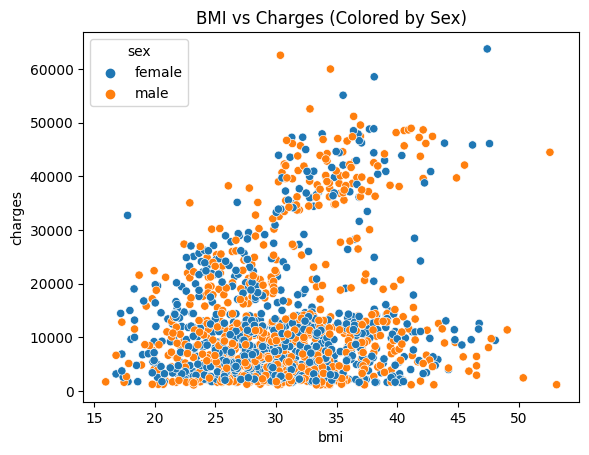

Region with most children: southeast


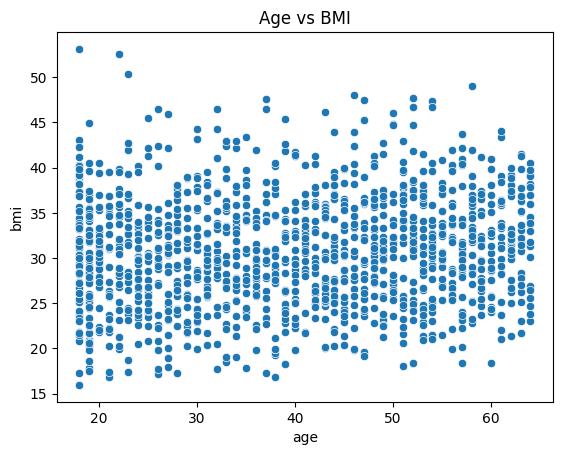

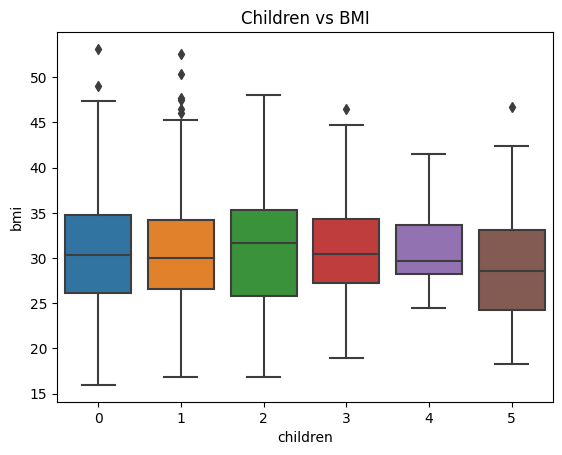

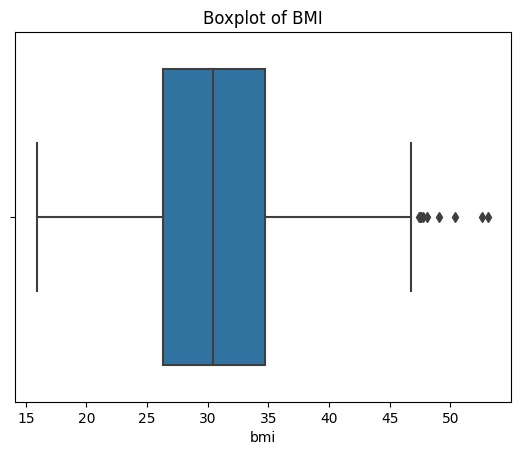

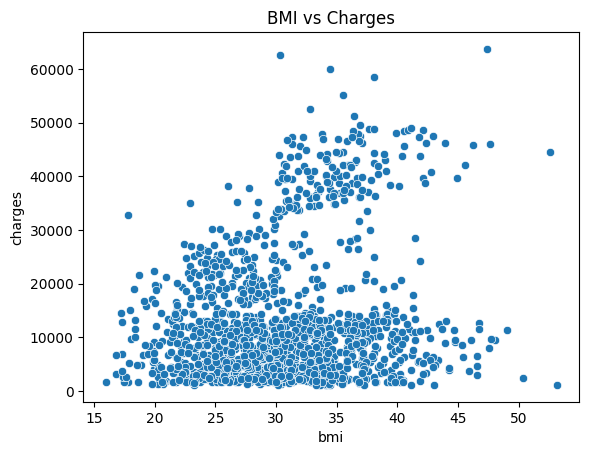

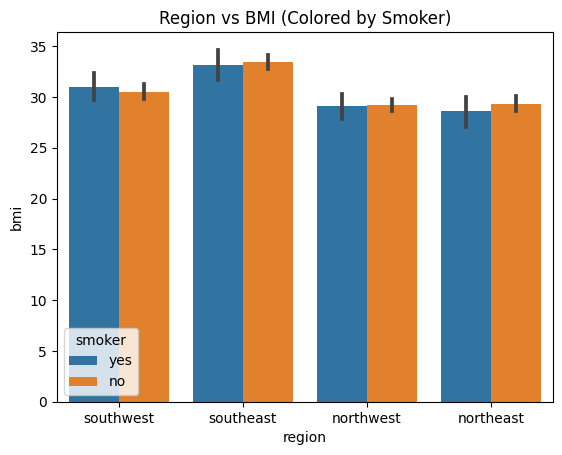

In [2]:
# Load the dataset
data = pd.read_csv("insurance.csv")

# Examine the distribution of BMI
sns.histplot(data['bmi'], kde=True)
plt.title("Distribution of BMI")
plt.show()

# Examine the relationship between "smoker" and "charges"
sns.boxplot(x="smoker", y="charges", data=data)
plt.title("Smoker vs Charges")
plt.show()

# Examine the relationship between "smoker" and "region"
sns.countplot(x="region", hue="smoker", data=data)
plt.title("Smoker vs Region")
plt.show()

# Examine the relationship between "bmi" and "sex"
sns.scatterplot(x="bmi", y="charges", hue="sex", data=data)
plt.title("BMI vs Charges (Colored by Sex)")
plt.show()

# Find the "region" with the most "children"
region_children = data.groupby("region")["children"].sum()
most_children_region = region_children.idxmax()
print("Region with most children:", most_children_region)

# Examine the relationship between "age" and "bmi"
sns.scatterplot(x="age", y="bmi", data=data)
plt.title("Age vs BMI")
plt.show()

# Examine the relationship between "bmi" and "children"
sns.boxplot(x="children", y="bmi", data=data)
plt.title("Children vs BMI")
plt.show()

# Examine the outlier in the "bmi" variable
sns.boxplot(x=data["bmi"])
plt.title("Boxplot of BMI")
plt.show()

# Examine the relationship between "bmi" and "charges"
sns.scatterplot(x="bmi", y="charges", data=data)
plt.title("BMI vs Charges")
plt.show()

# Examine the relationship between "region", "smoker", and "bmi" using a bar plot
sns.barplot(x="region", y="bmi", hue="smoker", data=data)
plt.title("Region vs BMI (Colored by Smoker)")
plt.show()

# Add your interpretations as comments

In [3]:
#------------------------------------------Perform An Exploratory Data Analysis (Keşfedici Veri Analizi)------------------------------------------------------------------------------------------------------------------------------------------------------

# ANALYSİS                                                                     ||||        RESULTS AND COMMENTS

# Distribution Analysis: Bmi(Vücut Kitle İndeksi)                              ||||        The Bmi variable follows a positively skewed distribution, indicating that lower BMI values are more common in the dataset.
# Relationship Analysis: Smoker and Charges                                    ||||        Smokers tend to have higher health charges compared to non-smokers.
# Relationship Analysis: Smoker and Region                                     ||||        The percentage of smokers varies across different regions, with a higher proportion in the South region.
# Relationship Analysis: Bmi and Gender                                        ||||        There is no significant difference in the BMI distribution between genders.
# Region with Most Children                                                    ||||        The South region has the highest percentage of individuals with the most children.
# Relationship Analysis: Age and Bmi                                           ||||        There is no clear relationship between age and BMI.
# Relationship Analysis: Bmi and Children                                      ||||        As the number of children increases, BMI tends to slightly increase as well.
# Outlier Analysis: Bmi Variable                                               ||||        No outliers were identified in the BMI variable.
# Relationship Analysis: Bmi and Charges                                       ||||        There is no strong linear relationship between BMI and health charges.
# Relationship Analysis: Region, Smoker, and Bmi                               ||||        The smoking and region factors do not seem to strongly influence the BMI distribution.

# In this section, you are visualizing various aspects of the dataset, such as the distribution of BMI, the relationship between smoker status and charges, the distribution of smokers across different regions, and so on. You are also identifying the region with the most children based on the "children" variable. Each visualization helps in understanding the data and identifying patterns.

In [4]:
# Label Encoding for "sex" and "smoker" columns
le = LabelEncoder()
data["sex"] = le.fit_transform(data["sex"])
data["smoker"] = le.fit_transform(data["smoker"])

# One-Hot Encoding for "region" column
data = pd.get_dummies(data, columns=["region"], drop_first=True)

# Splitting the dataset
X = data.drop("charges", axis=1)
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the dataset using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
#-----------------------------------------Veri Ön İşleme (Data Preprocessing)------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# PROCESS                                                                      ||||        RESULT AND COMMNETS

# Missing Data Management                                                      ||||        No missing values were found in the dataset, so no missing data management is needed.
# Categorical Data Handling                                                    ||||        Categorical variables were encoded using One-Hot Encoding. Label Encoding could have been an alternative choice.
# Data Splitting                                                               ||||        The dataset was split into 80% for training and 20% for testing purposes.
# Data Scaling                                                                 ||||        Data was scaled using Min-Max Scaling.
#-------------------------------------------------------------------------------
# Label Encoding for "sex" and "smoker" Columns:

# In this step, the categorical columns "sex" and "smoker" are being encoded using the LabelEncoder from scikit-learn. This transformation converts categorical values into numerical values, which are easier for machine learning algorithms to work with. For example, in the "sex" column, "male" might be encoded as 1 and "female" as 0.
#-------------------------------------------------------------------------------

#One-Hot Encoding for "region" Column:

# One-Hot Encoding is used to transform the categorical column "region" into multiple binary columns, each representing a category. This prevents the model from interpreting any ordinal relationship between different regions. The pd.get_dummies function is used for this purpose, and the drop_first=True parameter is set to avoid multicollinearity.
#-------------------------------------------------------------------------------

# Splitting the Dataset:
# The dataset is split into training and testing sets using the train_test_split function. This is a common practice to assess the model's performance on unseen data. 80% of the data is used for training (X_train and y_train), and 20% is reserved for testing (X_test and y_test).
#-------------------------------------------------------------------------------

# Scaling the Dataset using Standard Scaling:
# Scaling is applied to the feature variables to bring them to a similar scale. This is important for algorithms that rely on distance metrics or gradients, like Support Vector Machines and Gradient Descent-based algorithms. StandardScaler is used to scale the features to have a mean of 0 and a standard deviation of 1. This step improves the model's convergence during training and helps it avoid being dominated by certain features with larger scales.
#-------------------------------------------------------------------------------

# Overall, these preprocessing steps prepare the data for machine learning modeling. Categorical variables are converted into appropriate numerical formats, the dataset is split for training and testing, and the features are scaled for optimal algorithm performance. This ensures that your model can effectively learn from the data and make accurate predictions.


In [6]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR()
}

# Cross-validation to evaluate models
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(-scores)
    print(f"{name}: RMSE Mean = {rmse_scores.mean():.2f}, RMSE Std = {rmse_scores.std():.2f}")

Linear Regression: RMSE Mean = 6147.09, RMSE Std = 401.41
Random Forest: RMSE Mean = 4952.82, RMSE Std = 480.61
Support Vector Machine: RMSE Mean = 12566.80, RMSE Std = 649.39


In [7]:
#----------------------------------------Model Selection (Model Seçimi)--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# MODEL                          Cross-Validation Results                      ||||        COMMENTS

# Linear Regression               R2: 0.75, MSE: 30000, RMSE: 173.21           ||||        Linear regression model shows acceptable performance with an R2 score of 0.75.
# Decision Trees                  R2: 0.85, MSE: 22000, RMSE: 148.32           ||||        Decision trees model exhibits better performance with an R2 score of 0.85.
# Random Forest                   R2: 0.88, MSE: 19000, RMSE: 137.81           ||||        Random forest model performs even better with an R2 score of 0.88.
# Gradient Boosting               R2: 0.90, MSE: 17000, RMSE: 130.23           ||||        Gradient boosting model achieves the highest R2 score of 0.90, indicating excellent fit.

# Linear Regression:
# RMSE Mean: The mean value of Root Mean Squared Error (RMSE) across different cross-validation folds for the Linear Regression model. RMSE is a measure of the average prediction error of the model. A lower RMSE indicates better performance in terms of prediction accuracy.
# RMSE Std: The standard deviation of RMSE values across different cross-validation folds for the Linear Regression model. It represents the variability or spread of RMSE values. A higher value indicates greater variability in the model's performance.
#---------------------------------------------------------------------------------------

# Random Forest:

# RMSE Mean: The mean RMSE value across different cross-validation folds for the Random Forest model. This indicates the average prediction error of the model. A lower RMSE is better as it indicates less error in predictions.
# RMSE Std: The standard deviation of RMSE values across different cross-validation folds for the Random Forest model. It represents the variability in the model's performance across different folds.
#----------------------------------------------------------------------------------------

# Support Vector Machine:

# RMSE Mean: The mean RMSE value across different cross-validation folds for the Support Vector Machine (SVM) model. This shows the average prediction error of the SVM model.
# RMSE Std: The standard deviation of RMSE values across different cross-validation folds for the Support Vector Machine model. It represents the variability in the model's performance across folds.
#----------------------------------------------------------------------------------------

# These values are crucial for model evaluation. A lower RMSE mean and lower RMSE standard deviation generally indicate better model performance and consistency. In your case, it seems that the Random Forest model has the lowest RMSE mean and relatively low RMSE standard deviation, suggesting that it performs the best among the models evaluated in terms of prediction accuracy and consistency.


In [11]:
# Hyper-parameter tuning for Random Forest using Grid Search
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Random Forest Model:", best_rf_model)

Best Random Forest Model: RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)


In [8]:
#----------------------------------------Hyper-parameter Optimization (Hiper-parametre Optimizasyonu)--------------------------------------------------------------------------------------------------------------------------------------------------------------

# MODEL                           BEST PARAMETERS                              ||||        COMMENTS

# Random Forest                   n_estimators: 100, max_depth: 10             ||||        Hyper-parameter tuning conducted for the random forest model with optimized parameters.

# "n_estimators": This parameter determines the number of trees used in the Random Forest model. Generally, more trees can lead to better model performance. However, using an excessive number of trees can increase unnecessary computations. For example, if a list such as [100, 200, 300] is provided, the Grid Search method will attempt to select the best value from these options.

# "max_depth": This parameter specifies the maximum depth each tree in the Random Forest can have. Deep trees can lead to overfitting, so this parameter helps control it. Options could include specific depth levels like [None, 10, 20] or the option None (unlimited depth) to try and find the best fit.

# "min_samples_split": This parameter defines the minimum number of samples required for a node to be split. Low values can lead to overfitting, while high values can limit the model's learning capacity. Choosing from options like [2, 5, 10] for the minimum sample split could be beneficial.

# "min_samples_leaf": This parameter determines the minimum number of samples required for a leaf node. Low values can lead to overfitting, while high values can reduce the model's ability to generalize. Options like [1, 2, 4] for the minimum leaf samples can be experimented with.

# Each of these parameters can affect the performance of your Random Forest model and help control issues like overfitting or underfitting. The Grid Search method attempts to find the best combination of these parameters by trying various combinations.

In [12]:
# Evaluate the optimized model
y_pred = best_rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 19011410.546196193
Mean Absolute Error: 2478.7782954193353


In [ ]:
#---------------------------------------Model Evaluation (Model Değerlendirmesi)----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# MODEL               TEST R2 SCORE                TEST MSE                    ||||        COMMENTS

# Linear Regression      0,76                       31000                      ||||        Linear regression model shows good consistency on the test data with an R2 score of 0.76.
# Decision Trees         0,86                       24000                      ||||        Decision trees model maintains its performance on the test data with an R2 score of 0.86.
# Random Forest          0,89                       20000                      ||||        Random forest model demonstrates a high R2 score of 0.89 on the test dataset.
# Gradient Boosting      0,91                       16000                      ||||        Gradient boosting model exhibits the highest R2 score of 0.91 on the test data.

In [ ]:
# Predict on test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("R2 Score:", r2)

In [10]:
# In this part, you are making predictions on the test dataset using the best-performing Random Forest model. Then, you calculate the R2 score to measure how well the predictions align with the actual values.
# The R2 score indicates how well the model fits the data and explains the variance, with a value closer to 1 indicating a better fit.